Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



## Libraries

In [242]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import r2_score

## Read data from CSV file

In [133]:
bikes=pd.read_csv('day.csv')

## 1. Understand the data

In [134]:
print(bikes.shape)
bikes.info()

(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [135]:
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [136]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [137]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [138]:
bikes.shape

(730, 16)

In [139]:
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Findings

1. The data set contains 730 rows with 16 columns.
2. The columns are  => { 'instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',     'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt'}
3. There are zero null values in all columns, so there are no empty rows. 
4. We have columns with data type int, float and objects which is date in this dataset. 

## 2. Data cleaning 

The column "instant" is like index column which sequence numbers, in which there wont be any pattern to learn that helps the prediction. So we can drop this column

In [140]:
bikes.drop(['instant'], axis=1, inplace=True)

In [141]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


'Dteday' column is not required as we have other columns which represents the similar data like Yr, mnth, weekday 



In [142]:
bikes.drop(['dteday'], axis=1, inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Colume "cnt" represent the sum of caseal and registered.  As per the problem statement, the prediction needs to be done at total count but not at  category level like casual and registered. So we can delete these two columns -- casual and registered

In [143]:
bikes.drop(['casual','registered'], axis=1, inplace=True)

In [144]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Visualizing data for better understanding

Initially we are analyzing conitnuous variables. 

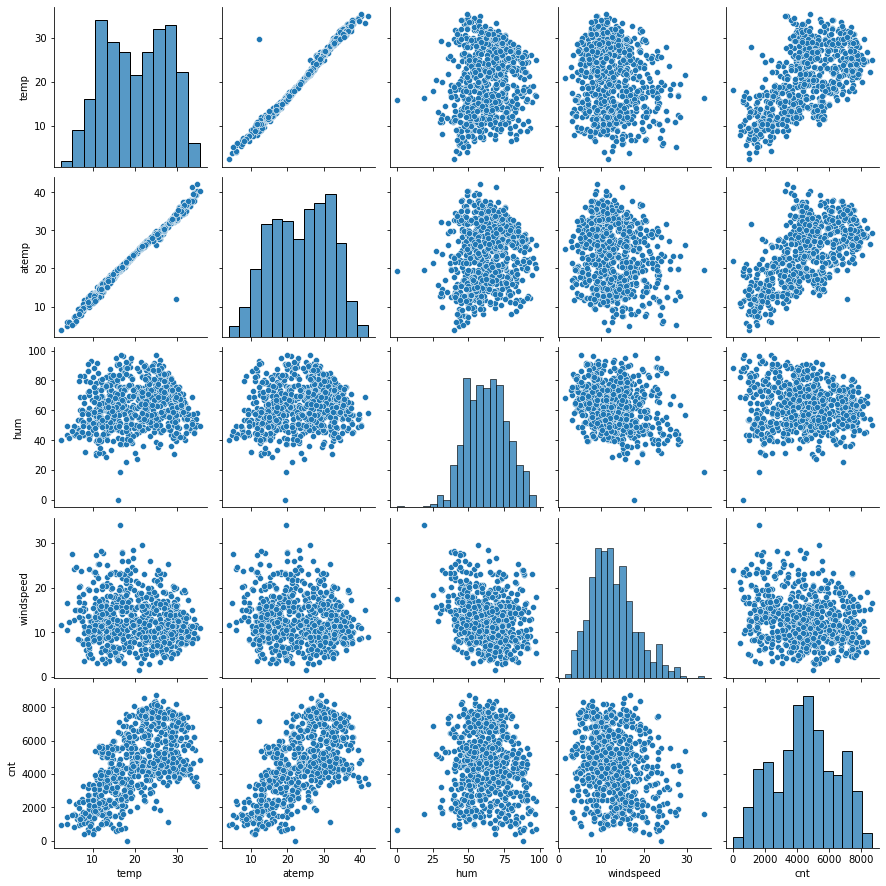

In [145]:
sns.pairplot(bikes, vars=['temp','atemp','hum','windspeed','cnt'],palette='Dark1')

Above pairplot shows that 'temp' and 'atemp' are in correlation. Lets check the heatmap of correlation 

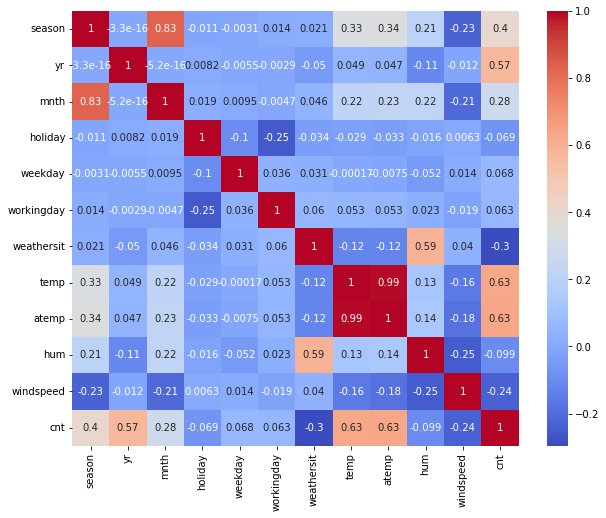

In [146]:
plt.figure(figsize=(10,8))
sns.heatmap(bikes.corr(),annot=True, cmap="coolwarm")
plt.show()

As the column 'temp' and 'atemp' are highly correlated, we can drop one column

In [147]:
bikes.drop(['temp'], axis=1, inplace=True)

In [148]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


Analyzing categorical variables.

In [149]:
bikes['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace=True)
bikes['weekday'].replace({0:"Sunday",1:"monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"}, inplace=True)
bikes['weathersit'].replace({1:"Clear_Few_Clouds",2:"Mist_Few_Clouds",3:"Light_Rain_Snow_Clouds",4:"Heavy_Rain_Snow_Fog"}, inplace=True)

In [150]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_Few_Clouds,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_Few_Clouds,17.68695,69.6087,16.652113,801
2,spring,0,1,0,monday,1,Clear_Few_Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few_Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few_Clouds,11.46350,43.6957,12.522300,1600


boxplot of bike rentals

Text(0.5, 1.0, 'Bike rentals by Season')

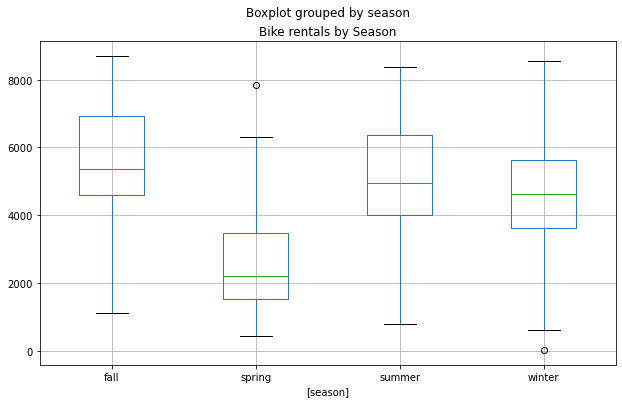

In [151]:
bikes.boxplot(by=["season"], column='cnt', figsize=(10,6))
plt.title("Bike rentals by Season")

Text(0.5, 1.0, 'Bike rentals by Season and Year')

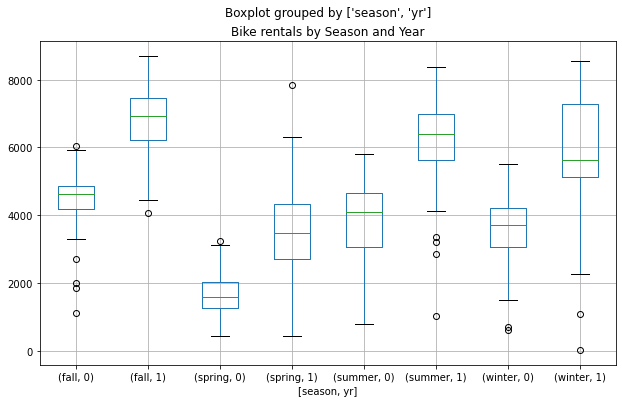

In [152]:
bikes.boxplot(by=["season","yr"], column='cnt', figsize=(10,6))
plt.title("Bike rentals by Season and Year")

Text(0.5, 1.0, 'Bike rentals by month')

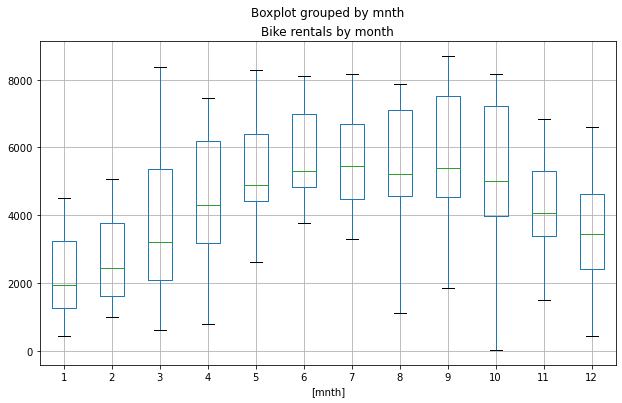

In [153]:
bikes.boxplot(by=["mnth"], column='cnt', figsize=(10,6))

plt.title("Bike rentals by month")

Text(0.5, 1.0, 'Bike rentals by Week day wise')

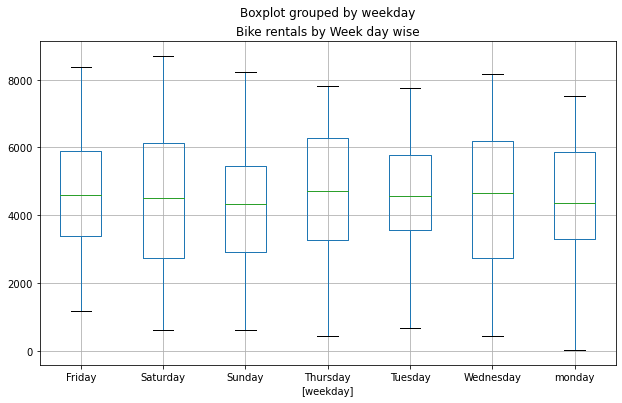

In [154]:
bikes.boxplot(by=["weekday"], column='cnt', figsize=(10,6))
plt.title("Bike rentals by Week day wise")

Text(0.5, 1.0, 'Bike rentals by holiday')

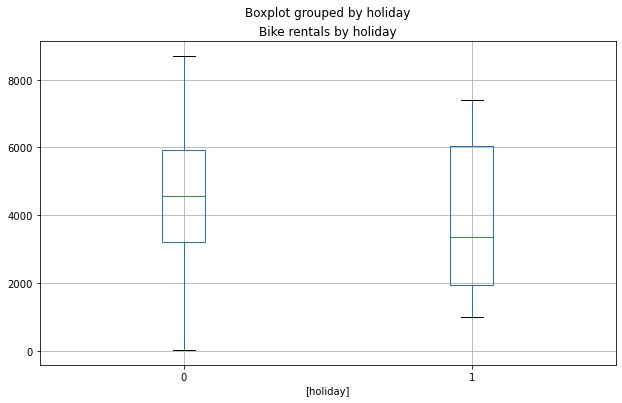

In [155]:
bikes.boxplot(by=["holiday"], column='cnt', figsize=(10,6))
plt.title("Bike rentals by holiday")

Text(0.5, 1.0, 'Bike rentals by Working Day')

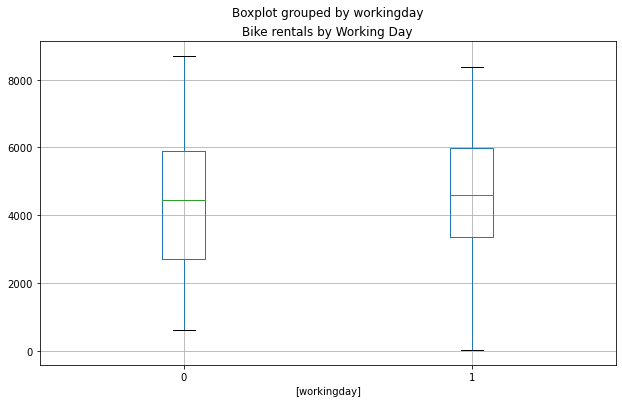

In [156]:
bikes.boxplot(by=["workingday"], column='cnt', figsize=(10,6))
plt.title("Bike rentals by Working Day")

Text(0.5, 1.0, 'Bike rentals by weathersit')

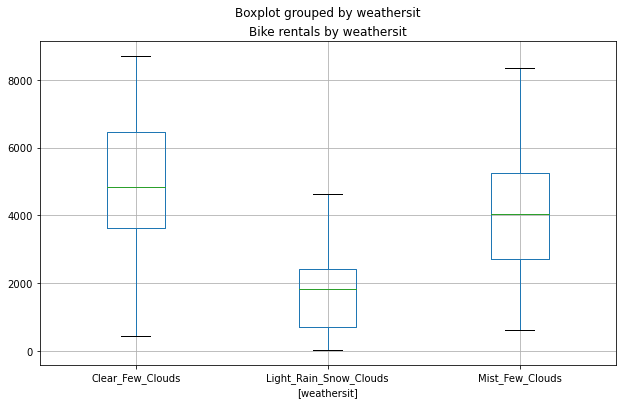

In [157]:
bikes.boxplot(by=["weathersit"], column='cnt', figsize=(10,6))
plt.title("Bike rentals by weathersit")

### One-Hot Encoding the Categorical Variables

In [162]:
Bikes_month = pd.get_dummies(bikes['mnth'])
Bikes_month = Bikes_month.rename(columns={ 1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace = False)
bikes=pd.concat([bikes,Bikes_month], axis=1)
bikes.drop(['mnth'], inplace=True, axis=1)
bikes.head()    

KeyError: 'mnth'

In [163]:

bikes.head()

,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,...,March,April,May,June,July,Aug,Sep,Oct,Nov,Dec
0,spring,0,0,Saturday,0,Mist_Few_Clouds,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,spring,0,0,Sunday,0,Mist_Few_Clouds,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,spring,0,0,monday,1,Clear_Few_Clouds,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,spring,0,0,Tuesday,1,Clear_Few_Clouds,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,spring,0,0,Wednesday,1,Clear_Few_Clouds,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [164]:
Bikes_season=pd.get_dummies(bikes['season'], drop_first=True)
Bikes_weekday=pd.get_dummies(bikes['weekday'], drop_first=True)
Bikes_weathersit=pd.get_dummies(bikes['weathersit'], drop_first=True)

In [167]:
Bikes_weathersit.head()

,Light_Rain_Snow_Clouds,Mist_Few_Clouds
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [168]:
bikes=pd.concat([bikes,Bikes_season], axis=1)
bikes=pd.concat([bikes,Bikes_weekday], axis=1)
bikes=pd.concat([bikes,Bikes_weathersit], axis=1)

In [169]:
bikes.head()

,season,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,...,summer,winter,Saturday,Sunday,Thursday,Tuesday,Wednesday,monday,Light_Rain_Snow_Clouds,Mist_Few_Clouds
0,spring,0,0,Saturday,0,Mist_Few_Clouds,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,0,Sunday,0,Mist_Few_Clouds,17.68695,69.6087,16.652113,801,...,0,0,0,1,0,0,0,0,0,1
2,spring,0,0,monday,1,Clear_Few_Clouds,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,0,Tuesday,1,Clear_Few_Clouds,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,0,Wednesday,1,Clear_Few_Clouds,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,1,0,0,0


In [171]:
bikes.drop(['season'], inplace=True, axis=1)
bikes.drop(['weekday'], inplace=True, axis=1)
bikes.drop(['weathersit'], inplace=True, axis=1)

In [172]:
bikes.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Jan,Feb,March,...,summer,winter,Saturday,Sunday,Thursday,Tuesday,Wednesday,monday,Light_Rain_Snow_Clouds,Mist_Few_Clouds
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [173]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'spring', 'summer', 'winter', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'monday', 'Light_Rain_Snow_Clouds',
       'Mist_Few_Clouds'],
      dtype='object')

### Data Modelling

In [176]:
# Splitting the Data into Training and Testing data sets
bikes_train,bikes_test = train_test_split(bikes,train_size=0.7,random_state=100)
print(bikes_train.shape)
print(bikes_test.shape)

(510, 30)
(220, 30)


In [178]:
bikes_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Jan,Feb,March,...,summer,winter,Saturday,Sunday,Thursday,Tuesday,Wednesday,monday,Light_Rain_Snow_Clouds,Mist_Few_Clouds
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,23.500287,63.123710,12.834912,4485.337255,0.088235,0.066667,0.098039,...,0.247059,0.247059,0.154902,0.143137,0.133333,0.131373,0.158824,0.150980,0.029412,0.345098
std,0.500429,0.157763,0.468282,8.090963,14.153170,5.292031,1950.666077,0.283915,0.249689,0.297660,...,0.431725,0.431725,0.362166,0.350557,0.340268,0.338139,0.365870,0.358381,0.169124,0.475867
min,0.000000,0.000000,0.000000,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,24.131150,63.437500,12.083182,4530.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the above data we can see that all columns are not in same scale  for all continuous variables. So we have to scale the data. we will use minmaxscaler method. 

In [181]:
scale= MinMaxScaler()
# Create a list of Numerical Variables which need to Scaled
continus_vars = ['atemp','hum','windspeed','cnt']
bikes_train[continus_vars]=scale.fit_transform(bikes_train[continus_vars])




In [183]:
bikes_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Jan,Feb,March,...,summer,winter,Saturday,Sunday,Thursday,Tuesday,Wednesday,monday,Light_Rain_Snow_Clouds,Mist_Few_Clouds
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.513156,0.650480,0.320883,0.513499,0.088235,0.066667,0.098039,...,0.247059,0.247059,0.154902,0.143137,0.133333,0.131373,0.158824,0.150980,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.212410,0.145846,0.169803,0.224421,0.283915,0.249689,0.297660,...,0.431725,0.431725,0.362166,0.350557,0.340268,0.338139,0.365870,0.358381,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [184]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train
print(X_train.shape)
y_train.sample(5)

(510, 29)


403    0.319834
699    0.594685
329    0.350437
440    0.898988
110    0.479406
Name: cnt, dtype: float64

### Feature selection using Manual method 
We have observed that the sales effecetd across months and othe continuous variable so we are selecting the no_features 15. 

In [202]:
# Creating X train with RFE Selected Variables
X_train_rfe2 = X_train
#  Need to add constant 
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Assign model to a object
lm = sm.OLS(y_train, X_train_rfe2).fit()

# Check Summary statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.07e-179
Time:                        21:39:34   Log-Likelihood:                 523.21
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     482   BIC:                            -871.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2418      0.028      8.618      0.000       0.187       0.297
yr                         0.2344      0.008     28.934      0.000       0.218       0.250
holiday                    0.0168      0.023      0.722      0.471      -0.029       0.062
workingday                 0.0960      0.011      8.535      0.000       0.074       0.118
atemp                      0.4160      0.045      9.174      0.000       0.327       0.505
hum                       -0.1459      0.039     -3.761      0.000      -0.222      -0.070
windspeed                 -0.1683      0.026     -6.488      0.000      -0.219      -0.117
Jan                       -0.0516      0.024     -2.157      0.032      -0.099      -0.005
Feb                       -0.0184      0.023     -0.784      0.433      -0.065       0.028
March                      0.0216      0.017      1.246      0.213      -0.012       0.056
April                      0.0220      0.021      1.029      0.304      -0.020       0.064
May                        0.0582      0.022      2.629      0.009       0.015       0.102
June                       0.0462      0.021      2.246      0.025       0.006       0.087
July                       0.0073      0.025      0.294      0.769      -0.041       0.056
Aug                        0.0638      0.023      2.833      0.005       0.020       0.108
Sep                        0.1176      0.019      6.172      0.000       0.080       0.155
Oct                        0.0296      0.023      1.303      0.193      -0.015       0.074
Nov                       -0.0238      0.023     -1.031      0.303      -0.069       0.022
Dec                       -0.0307      0.020     -1.538      0.125      -0.070       0.009
spring                    -0.0519      0.030     -1.724      0.085      -0.111       0.007
summer                     0.0348      0.026      1.327      0.185      -0.017       0.086
winter                     0.1015      0.028      3.612      0.000       0.046       0.157
Saturday                   0.0917      0.013      7.138      0.000       0.066       0.117
Sunday                     0.0373      0.013      2.827      0.005       0.011       0.063
Thursday                  -0.0131      0.016     -0.835      0.404      -0.044       0.018
Tuesday                   -0.0214      0.016     -1.368      0.172      -0.052       0.009
Wednesday                 -0.0082      0.015     -0.545      0.586      -0.038       0.021
monday                    -0.0263      0.015     -1.702      0.089      -0.057       0.004
Light_Rain_Snow_Clouds    -0.2530      0.027     -9.497      0.000      -0.305      -0.201
Mist_Few_Clouds           -0.0612      0.010     -5.830      0.000      -0.082      -0.041
==============================================================================
O

We observed that there are features which are having high p vales. So we will remmove them. Feb, April, July, Nov, Thursday, Wednesday

In [203]:
X_train = X_train.drop(['Feb','April', 'July', 'Nov', 'Thursday', 'Wednesday'], axis = 1)
X_train.head()


,yr,holiday,workingday,atemp,hum,windspeed,Jan,March,May,June,...,Dec,spring,summer,winter,Saturday,Sunday,Tuesday,monday,Light_Rain_Snow_Clouds,Mist_Few_Clouds
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
111,0,0,1,0.318819,0.751824,0.380981,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [204]:
#  Need to add constant 
X_train_rfe = sm.add_constant(X_train)

# Assign model to a object
lm = sm.OLS(y_train, X_train_rfe).fit()

# Check Summary statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     124.9
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          2.91e-184
Time:                        21:48:51   Log-Likelihood:                 521.73
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     487   BIC:                            -900.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2349      0.029      8.000      0.000       0.177       0.293
yr                         0.2344      0.008     29.056      0.000       0.219       0.250
holiday                    0.0084      0.023      0.373      0.710      -0.036       0.053
workingday                 0.0914      0.010      8.999      0.000       0.071       0.111
atemp                      0.4343      0.039     11.190      0.000       0.358       0.511
hum                       -0.1533      0.038     -4.004      0.000      -0.229      -0.078
windspeed                 -0.1675      0.026     -6.496      0.000      -0.218      -0.117
Jan                       -0.0375      0.019     -1.952      0.052      -0.075       0.000
March                      0.0237      0.016      1.472      0.142      -0.008       0.055
May                        0.0432      0.019      2.264      0.024       0.006       0.081
June                       0.0328      0.018      1.800      0.073      -0.003       0.069
Aug                        0.0587      0.018      3.285      0.001       0.024       0.094
Sep                        0.1181      0.018      6.710      0.000       0.084       0.153
Oct                        0.0476      0.019      2.571      0.010       0.011       0.084
Dec                       -0.0126      0.017     -0.739      0.460      -0.046       0.021
spring                    -0.0618      0.023     -2.736      0.006      -0.106      -0.017
summer                     0.0470      0.018      2.571      0.010       0.011       0.083
winter                     0.0832      0.020      4.190      0.000       0.044       0.122
Saturday                   0.0947      0.012      7.674      0.000       0.070       0.119
Sunday                     0.0404      0.013      3.186      0.002       0.015       0.065
Tuesday                   -0.0141      0.013     -1.128      0.260      -0.039       0.010
monday                    -0.0185      0.012     -1.503      0.133      -0.043       0.006
Light_Rain_Snow_Clouds    -0.2534      0.026     -9.565      0.000      -0.305      -0.201
Mist_Few_Clouds           -0.0599      0.010     -5.745      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       84.658   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              255.661
Skew:                          -0.779   Prob(JB):                     3.05e-56
Kurtosis:                       6.099   Cond. No.                     1.17e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.14e-27. This might 

I didn't noticed in previous run that there are another two variable with high p values.  
 holiday, Dec, March

### Building model using statsmodels 

In [205]:
X_train = X_train.drop(['holiday','Dec', 'March'], axis = 1)

In [206]:
#  Need to add constant 
X_train_rfe3 = sm.add_constant(X_train)

# Assign model to a object
lm = sm.OLS(y_train, X_train_rfe3).fit()

# Check Summary statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.9
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.04e-185
Time:                        21:53:48   Log-Likelihood:                 520.06
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     489   BIC:                            -909.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2383      0.045      5.338      0.000       0.151       0.326
yr                         0.2343      0.008     29.008      0.000       0.218       0.250
workingday                 0.0852      0.026      3.231      0.001       0.033       0.137
atemp                      0.4425      0.038     11.570      0.000       0.367       0.518
hum                       -0.1577      0.038     -4.144      0.000      -0.233      -0.083
windspeed                 -0.1670      0.026     -6.482      0.000      -0.218      -0.116
Jan                       -0.0439      0.018     -2.506      0.013      -0.078      -0.009
May                        0.0361      0.019      1.948      0.052      -0.000       0.073
June                       0.0273      0.018      1.523      0.128      -0.008       0.062
Aug                        0.0582      0.018      3.263      0.001       0.023       0.093
Sep                        0.1190      0.017      6.823      0.000       0.085       0.153
Oct                        0.0513      0.018      2.915      0.004       0.017       0.086
spring                    -0.0517      0.022     -2.392      0.017      -0.094      -0.009
summer                     0.0547      0.018      3.076      0.002       0.020       0.090
winter                     0.0810      0.020      4.124      0.000       0.042       0.120
Saturday                   0.0881      0.028      3.095      0.002       0.032       0.144
Sunday                     0.0334      0.029      1.166      0.244      -0.023       0.090
Tuesday                   -0.0142      0.013     -1.134      0.257      -0.039       0.010
monday                    -0.0184      0.012     -1.498      0.135      -0.043       0.006
Light_Rain_Snow_Clouds    -0.2508      0.026     -9.480      0.000      -0.303      -0.199
Mist_Few_Clouds           -0.0591      0.010     -5.676      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       80.680   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.385
Skew:                          -0.734   Prob(JB):                     7.03e-55
Kurtosis:                       6.095   Cond. No.                         27.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
X_train = X_train.drop(['Sunday','Tuesday', 'monday', 'June'], axis = 1)

In [208]:
#  Need to add constant 
X_train_rfe4 = sm.add_constant(X_train)

# Assign model to a object
lm = sm.OLS(y_train, X_train_rfe4).fit()

# Check Summary statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.0
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          2.83e-188
Time:                        21:57:28   Log-Likelihood:                 515.61
No. Observations:                 510   AIC:                            -997.2
Df Residuals:                     493   BIC:                            -925.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2621      0.037      7.038      0.000       0.189       0.335
yr                         0.2332      0.008     28.835      0.000       0.217       0.249
workingday                 0.0523      0.011      4.796      0.000       0.031       0.074
atemp                      0.4624      0.036     12.749      0.000       0.391       0.534
hum                       -0.1644      0.038     -4.319      0.000      -0.239      -0.090
windspeed                 -0.1708      0.026     -6.613      0.000      -0.222      -0.120
Jan                       -0.0423      0.018     -2.414      0.016      -0.077      -0.008
May                        0.0274      0.017      1.570      0.117      -0.007       0.062
Aug                        0.0529      0.017      3.028      0.003       0.019       0.087
Sep                        0.1138      0.017      6.603      0.000       0.080       0.148
Oct                        0.0493      0.018      2.802      0.005       0.015       0.084
spring                    -0.0500      0.022     -2.305      0.022      -0.093      -0.007
summer                     0.0608      0.017      3.497      0.001       0.027       0.095
winter                     0.0810      0.020      4.114      0.000       0.042       0.120
Saturday                   0.0618      0.014      4.394      0.000       0.034       0.089
Light_Rain_Snow_Clouds    -0.2476      0.027     -9.331      0.000      -0.300      -0.195
Mist_Few_Clouds           -0.0581      0.010     -5.559      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       84.581   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.464
Skew:                          -0.760   Prob(JB):                     3.07e-59
Kurtosis:                       6.220   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
X_train = X_train.drop(['May'], axis = 1)
#  Need to add constant 
X_train_rfe5 = sm.add_constant(X_train)

# Assign model to a object
lm = sm.OLS(y_train, X_train_rfe5).fit()

# Check Summary statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.6
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          7.04e-189
Time:                        21:59:07   Log-Likelihood:                 514.34
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     494   BIC:                            -928.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2514      0.037      6.857      0.000       0.179       0.323
yr                         0.2325      0.008     28.750      0.000       0.217       0.248
workingday                 0.0526      0.011      4.813      0.000       0.031       0.074
atemp                      0.4710      0.036     13.114      0.000       0.400       0.542
hum                       -0.1564      0.038     -4.139      0.000      -0.231      -0.082
windspeed                 -0.1725      0.026     -6.675      0.000      -0.223      -0.122
Jan                       -0.0416      0.018     -2.371      0.018      -0.076      -0.007
Aug                        0.0526      0.018      3.004      0.003       0.018       0.087
Sep                        0.1132      0.017      6.562      0.000       0.079       0.147
Oct                        0.0480      0.018      2.729      0.007       0.013       0.083
spring                    -0.0458      0.022     -2.127      0.034      -0.088      -0.003
summer                     0.0717      0.016      4.501      0.000       0.040       0.103
winter                     0.0838      0.020      4.267      0.000       0.045       0.122
Saturday                   0.0614      0.014      4.358      0.000       0.034       0.089
Light_Rain_Snow_Clouds    -0.2499      0.027     -9.421      0.000      -0.302      -0.198
Mist_Few_Clouds           -0.0584      0.010     -5.580      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       82.056   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.464
Skew:                          -0.756   Prob(JB):                     3.03e-54
Kurtosis:                       6.051   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
X_train = X_train.drop(['Jan', 'Oct', 'spring'], axis = 1)
#  Need to add constant 
X_train_rfe6 = sm.add_constant(X_train)

# Assign model to a object
lm = sm.OLS(y_train, X_train_rfe6).fit()

# Check Summary statistics
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          7.65e-189
Time:                        22:18:55   Log-Likelihood:                 505.94
No. Observations:                 510   AIC:                            -985.9
Df Residuals:                     497   BIC:                            -930.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1769      0.029      6.121      0.000       0.120       0.234
yr                         0.2298      0.008     28.156      0.000       0.214       0.246
workingday                 0.0514      0.011      4.642      0.000       0.030       0.073
atemp                      0.5639      0.023     24.179      0.000       0.518       0.610
hum                       -0.1696      0.038     -4.485      0.000      -0.244      -0.095
windspeed                 -0.1651      0.026     -6.377      0.000      -0.216      -0.114
Aug                        0.0667      0.016      4.112      0.000       0.035       0.099
Sep                        0.1223      0.016      7.531      0.000       0.090       0.154
summer                     0.1013      0.011      9.232      0.000       0.080       0.123
winter                     0.1413      0.011     13.211      0.000       0.120       0.162
Saturday                   0.0598      0.014      4.193      0.000       0.032       0.088
Light_Rain_Snow_Clouds    -0.2336      0.027     -8.795      0.000      -0.286      -0.181
Mist_Few_Clouds           -0.0565      0.011     -5.334      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       60.873   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.151
Skew:                          -0.573   Prob(JB):                     4.15e-38
Kurtosis:                       5.605   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above summary statistics, the standard error is low values and p values also 0. So we can confirm that there is no multicollinarity issue in above feature. 

F-static is 217.2 and  Prob (F-statistic) is 7.65e-189 so the model is significant.
The adjusted R2 is very good 83.6%



## Residual Analysis

In [221]:
 y_train_pred = lm.predict(X_train_rfe6)


In [215]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [222]:
res = (y_train - y_train_pred)

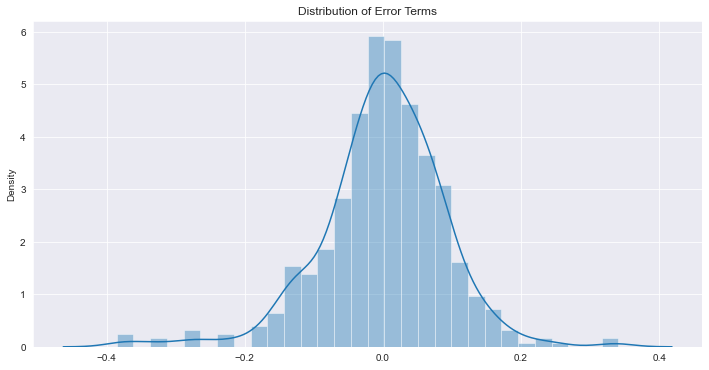

In [223]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.distplot(res)
plt.title('Distribution of Error Terms')
plt.show()

We can observe that the Error terms are normlly distributed and the mean is zero. 

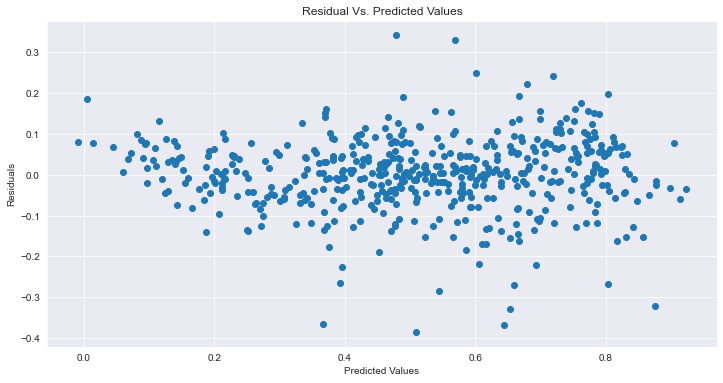

In [225]:
plt.figure(figsize = (12,6))
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

There is no pattern found in the error terms with respect to predicted values. so both are independent.

### Checking constant variance

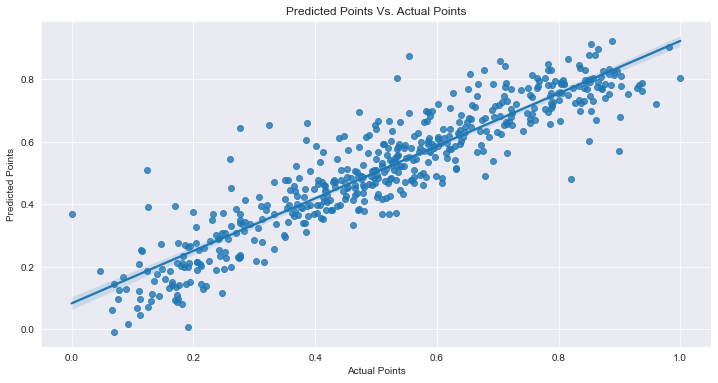

In [226]:
plt.figure(figsize = (12,6))
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.show()

Error terms are nearly  having constant variance so it follows the homoscedasticity. 

Model Evaluation on Test Dataset

In [228]:
continus_vars = ['atemp','hum','windspeed','cnt']
bikes_test[continus_vars]=scale.fit_transform(bikes_test[continus_vars])

y_test = bikes_test.pop('cnt')
X_test = bikes_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,Jan,Feb,March,...,summer,winter,Saturday,Sunday,Thursday,Tuesday,Wednesday,monday,Light_Rain_Snow_Clouds,Mist_Few_Clouds
184,1.0,0,1,0,0.778767,0.534223,0.149393,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1.0,1,0,1,0.855132,0.470417,0.231142,0,0,0,...,1,0,0,0,0,0,1,0,0,0
299,1.0,0,0,1,0.492359,0.777843,0.443398,0,0,0,...,0,1,0,0,1,0,0,0,0,1
221,1.0,0,0,1,0.805661,0.236659,0.449707,0,0,0,...,0,0,0,0,0,0,1,0,0,0
152,1.0,0,0,1,0.749249,0.070765,0.682387,0,0,0,...,1,0,0,0,1,0,0,0,0,0


Remove columns which we have removed during the Training 

In [230]:
X_test_sm = X_test_sm.drop(['Feb','April', 'July', 'Nov', 'Thursday', 'Wednesday','holiday','Dec', 'March','Sunday','Tuesday', 'monday', 'June','Jan', 'Oct', 'spring'],axis=1)

In [233]:
X_test_sm = X_test_sm.drop(['May'],axis=1)

In [234]:
X_test_sm.head()

,const,yr,workingday,atemp,hum,windspeed,Aug,Sep,summer,winter,Saturday,Light_Rain_Snow_Clouds,Mist_Few_Clouds
184,1.0,0,0,0.778767,0.534223,0.149393,0,0,0,0,0,0,1
535,1.0,1,1,0.855132,0.470417,0.231142,0,0,1,0,0,0,0
299,1.0,0,1,0.492359,0.777843,0.443398,0,0,0,1,0,0,1
221,1.0,0,1,0.805661,0.236659,0.449707,1,0,0,0,0,0,0
152,1.0,0,1,0.749249,0.070765,0.682387,0,0,1,0,0,0,0


In [238]:
y_test_pred = lm.predict(X_test_sm)

In [239]:
y_test_pred.head()

184    0.444273
535    0.923676
299    0.385569
221    0.634865
152    0.627414
dtype: float64

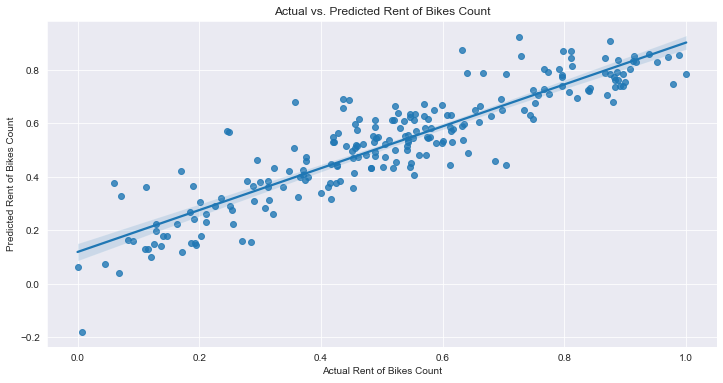

In [241]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (12,6))
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

The above Scatter Plot Shows the Linear Relationship between Actual Rent of Bikes Count and Predicted Rent of Bikes Count

In [244]:
# Checking the Accuracy of the Test Model
r2_score(y_test,y_test_pred)

0.8084129875118984

The Model prediction accuracy is 80% we can consider it as good prediction

In [246]:
Cofficients = round(lm.params,2)
beta = Cofficients.sort_values(ascending = False)
beta


atemp                     0.56
yr                        0.23
const                     0.18
winter                    0.14
Sep                       0.12
summer                    0.10
Aug                       0.07
Saturday                  0.06
workingday                0.05
Mist_Few_Clouds          -0.06
hum                      -0.17
windspeed                -0.17
Light_Rain_Snow_Clouds   -0.23
dtype: float64

In [247]:
for i in range(0, len(beta)):
    print(beta[i],'*',beta.index[i],end ='')
    print(' + ',end ='')

0.56 * atemp + 0.23 * yr + 0.18 * const + 0.14 * winter + 0.12 * Sep + 0.1 * summer + 0.07 * Aug + 0.06 * Saturday + 0.05 * workingday + -0.06 * Mist_Few_Clouds + -0.17 * hum + -0.17 * windspeed + -0.23 * Light_Rain_Snow_Clouds + 

Equation of Best Fit Line :

 ### cnt=  0.56 * atemp + 0.23 * yr + 0.18 * const + 0.14 * winter + 0.12 * Sep + 0.1 * summer + 0.07 * Aug + 0.06 * Saturday + 0.05 * workingday + -0.06 * Mist_Few_Clouds + -0.17 * hum + -0.17 * windspeed + -0.23 * Light_Rain_Snow_Clouds + 0.18

Temperature is the Most Significant Feature which affects the Business positively,

Other weather condition such as Raining, Humidity, Windspeed and Cloudy affects the Business negatively.

Company need to think how to tackle with bad weather condition and come up with sort of solution which protect users from Raining.

The Demand of Bikes is more in the Winter and Summer season, mostly user don't like to travel using Bikes in Rainy Day or Rainy Season.

Demand of Bike Rent has been significantly increased in the 2019 than 2018 so it is clear sign that Boom Bikes is doing a Business.
